### Importing required libraries:

In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.layers import Embedding, LSTM, Dense
from tensorflow.keras.models import Sequential
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.optimizers import Adam
import pickle
import numpy as np
import os

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving Pride and Prejudice.txt to Pride and Prejudice.txt


### Load and Pre-process the data

In [ ]:
file = open("Pride and Prejudice.txt", "r", encoding = "utf8")

# store file in list
lines = []
for i in file:
    lines.append(i)

# Convert list to string
data = ""
for i in lines:
  data = ' '. join(lines) 

#replace unnecessary stuff with space
data = data.replace('\n', '').replace('\r', '').replace('\ufeff', '').replace('“','').replace('”','')  #new line, carriage return, unicode character --> replace by space

#remove unnecessary spaces 
data = data.split()
data = ' '.join(data)
data[:500]

'The Project Gutenberg eBook of Pride and Prejudice, by Jane Austen This eBook is for the use of anyone anywhere in the United States and most other parts of the world at no cost and with almost no restrictions whatsoever. You may copy it, give it away or re-use it under the terms of the Project Gutenberg License included with this eBook or online at www.gutenberg.org. If you are not located in the United States, you will have to check the laws of the country where you are located before using th'

In [ ]:
len(data)

698483

### Apply Tokenization:

In [ ]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts([data])

# saving the tokenizer for predict function
pickle.dump(tokenizer, open('token.pkl', 'wb'))

sequence_data = tokenizer.texts_to_sequences([data])[0]
sequence_data[:15]

[1, 176, 157, 916, 3, 321, 4, 1174, 30, 72, 2535, 41, 916, 23, 21]

In [ ]:
len(sequence_data)

125317

In [ ]:
vocab_size = len(tokenizer.word_index) + 1
print(vocab_size)

7036


In [ ]:
sequences = []

for i in range(3, len(sequence_data)):
    words = sequence_data[i-3:i+1]
    sequences.append(words)
    
print("The Length of sequences are: ", len(sequences))
sequences = np.array(sequences)
sequences[:10]

The Length of sequences are:  125314


array([[   1,  176,  157,  916],
       [ 176,  157,  916,    3],
       [ 157,  916,    3,  321],
       [ 916,    3,  321,    4],
       [   3,  321,    4, 1174],
       [ 321,    4, 1174,   30],
       [   4, 1174,   30,   72],
       [1174,   30,   72, 2535],
       [  30,   72, 2535,   41],
       [  72, 2535,   41,  916]])

In [ ]:
X = []
y = []

for i in sequences:
    X.append(i[0:3])
    y.append(i[3])
    
X = np.array(X)
y = np.array(y)

In [ ]:
print("Data: ", X[:10])
print("Response: ", y[:10])

Data:  [[   1  176  157]
 [ 176  157  916]
 [ 157  916    3]
 [ 916    3  321]
 [   3  321    4]
 [ 321    4 1174]
 [   4 1174   30]
 [1174   30   72]
 [  30   72 2535]
 [  72 2535   41]]
Response:  [ 916    3  321    4 1174   30   72 2535   41  916]


In [ ]:
y = to_categorical(y, num_classes=vocab_size)
y[:5]

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

### Creating the Model:

In [ ]:
model = Sequential()
model.add(Embedding(vocab_size, 10, input_length=3))
model.add(LSTM(1000, return_sequences=True))
model.add(LSTM(1000))
model.add(Dense(1000, activation="relu"))
model.add(Dense(vocab_size, activation="softmax"))

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 3, 10)             70360     
_________________________________________________________________
lstm (LSTM)                  (None, 3, 1000)           4044000   
_________________________________________________________________
lstm_1 (LSTM)                (None, 1000)              8004000   
_________________________________________________________________
dense (Dense)                (None, 1000)              1001000   
_________________________________________________________________
dense_1 (Dense)              (None, 7036)              7043036   
Total params: 20,162,396
Trainable params: 20,162,396
Non-trainable params: 0
_________________________________________________________________


### Plot The Model:

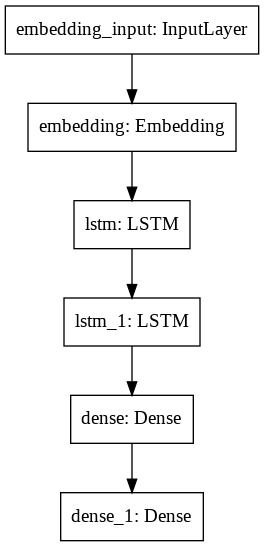

In [ ]:
from tensorflow import keras
from keras.utils.vis_utils import plot_model

keras.utils.plot_model(model, to_file='plot.png', show_layer_names=True)

### Build our model

In [ ]:
from tensorflow.keras.callbacks import ModelCheckpoint

checkpoint = ModelCheckpoint("next_words.h5", monitor='loss', verbose=1, save_best_only=True)
model.compile(loss="categorical_crossentropy", optimizer=Adam(learning_rate=0.001))
model.fit(X, y, epochs=70, batch_size=64, callbacks=[checkpoint])

Epoch 1/70
1959/1959 [==============================] - 38s 15ms/step - loss: 6.2359

Epoch 00001: loss improved from inf to 6.23590, saving model to next_words.h5
Epoch 2/70
1959/1959 [==============================] - 30s 15ms/step - loss: 5.5817

Epoch 00002: loss improved from 6.23590 to 5.58167, saving model to next_words.h5
Epoch 3/70
1959/1959 [==============================] - 30s 15ms/step - loss: 5.2482

Epoch 00003: loss improved from 5.58167 to 5.24822, saving model to next_words.h5
Epoch 4/70
1959/1959 [==============================] - 30s 15ms/step - loss: 5.0158

Epoch 00004: loss improved from 5.24822 to 5.01578, saving model to next_words.h5
Epoch 5/70
1959/1959 [==============================] - 30s 15ms/step - loss: 4.8120

Epoch 00005: loss improved from 5.01578 to 4.81196, saving model to next_words.h5
Epoch 6/70
1959/1959 [==============================] - 30s 15ms/step - loss: 4.6140

Epoch 00006: loss improved from 4.81196 to 4.61403, saving model to next_words

## Prediction

In [ ]:
from tensorflow.keras.models import load_model
import numpy as np
import pickle

# Load the model and tokenizer
model = load_model('next_words.h5')
tokenizer = pickle.load(open('token.pkl', 'rb'))

def Predict_Next_Words(model, tokenizer, text):

  sequence = tokenizer.texts_to_sequences([text])
  sequence = np.array(sequence)
  preds = np.argmax(model.predict(sequence))
  predicted_word = ""
  
  for key, value in tokenizer.word_index.items():
      if value == preds:
          predicted_word = key
          break
  
  print(predicted_word)
  return predicted_word


In [ ]:
while(True):
  text = input("Enter your line: ")
  
  if text == "0":
      print("Execution completed.....")
      break
  
  else:
      try:
          text = text.split(" ")
          text = text[-3:]
          print(text)
        
          Predict_Next_Words(model, tokenizer, text)
          
      except Exception as e:
        print("Error occurred: ",e)
        continue

Enter your line: The Project Gutenberg
['The', 'Project', 'Gutenberg']
literary
Enter your line: The Project Gutenberg eBook of
['Gutenberg', 'eBook', 'of']
pride
Enter your line: how can you abuse your own
['abuse', 'your', 'own']
children
Enter your line: He was quite
['He', 'was', 'quite']
young
Enter your line: was quite
['was', 'quite']
a
Enter your line: He could not help seeing that you were about five times as
['five', 'times', 'as']
pretty
Enter your line: and her sister
['and', 'her', 'sister']
scarcely
Enter your line: however, it may all come to
['all', 'come', 'to']
nothing
Enter your line: 0
Execution completed.....
